In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
df = pd.read_csv('data/car_price_prediction_.csv')
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [24]:
df.describe(include='all')

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [25]:
print('Missing Values')
df.isnull().sum()

Missing Values


Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [26]:
print('duplicates:',df.duplicated().sum())

duplicates: 0


### check unique values in categorical features

In [27]:
# Automatically get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']


In [28]:
for col in categorical_cols:
    print(f"\n{col} => {df[col].unique()} unique values")
    print(df[col].value_counts().head())


Brand => ['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota'] unique values
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Name: count, dtype: int64

Fuel Type => ['Petrol' 'Electric' 'Diesel' 'Hybrid'] unique values
Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64

Transmission => ['Manual' 'Automatic'] unique values
Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

Condition => ['New' 'Used' 'Like New'] unique values
Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

Model => ['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus'] unique values
Model
Fiesta     103
Corolla    103
A3          98
A4          96
Q7          95
Name: count, dtype: int64


### Visualizations

#### Price Distribution

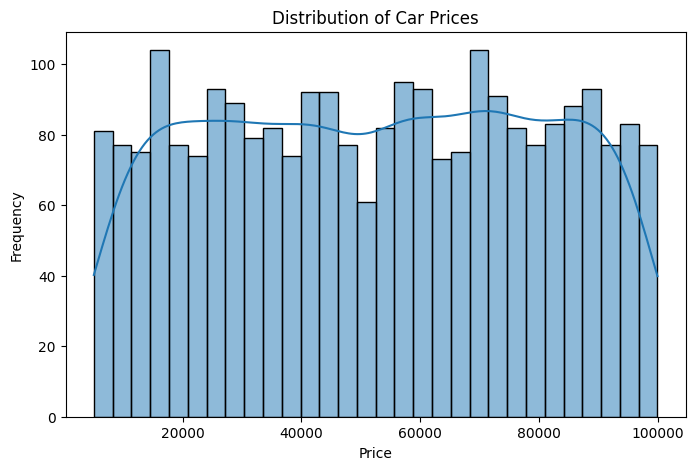

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Price vs Brand

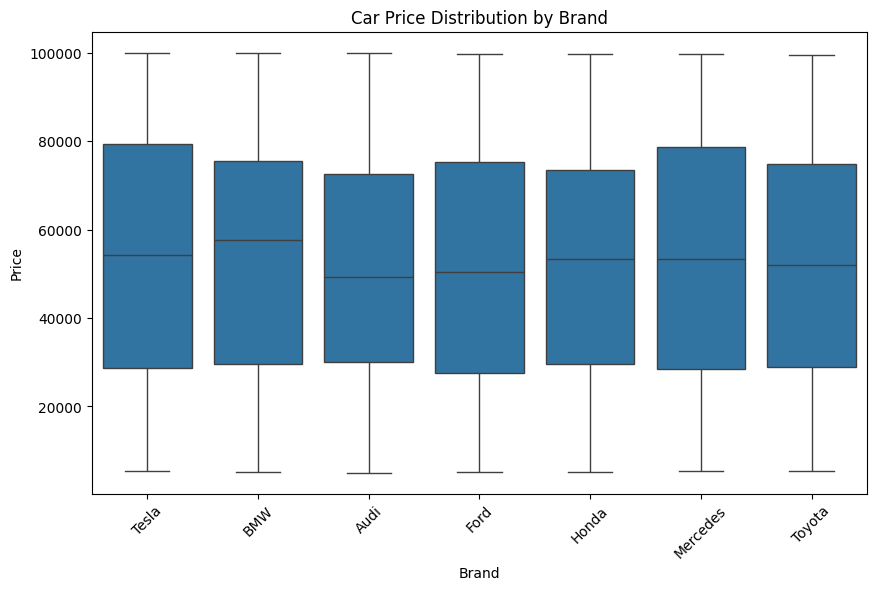

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Car Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

#### Price vs Condition

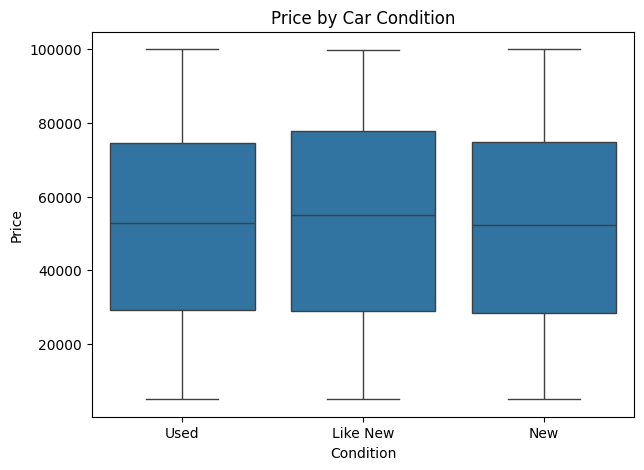

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Condition', y='Price', data=df, order=['Used', 'Like New', 'New'])
plt.title('Price by Car Condition')
plt.show()

#### Correlation Heatmap

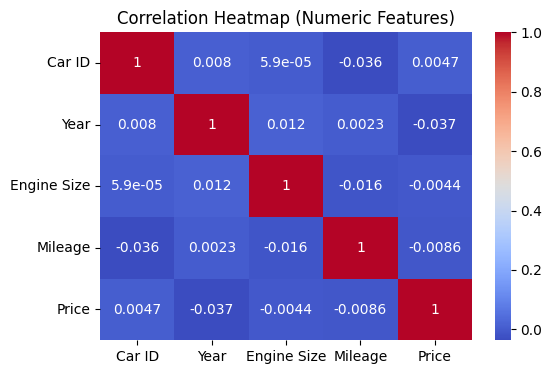

In [32]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

#### Average Price by Brand

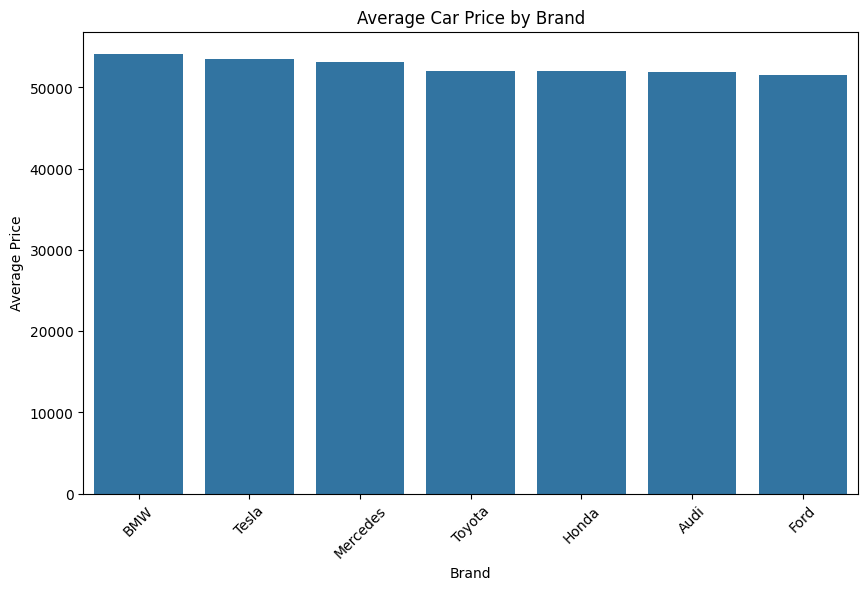

In [33]:
plt.figure(figsize=(10,6))
avg_price_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.title('Average Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#### Average Price by Fuel Type

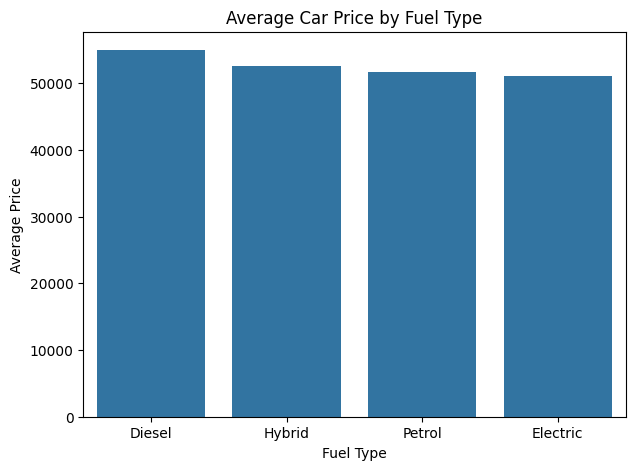

In [34]:
plt.figure(figsize=(7,5))
avg_price_fuel = df.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel.values)
plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price')
plt.show()

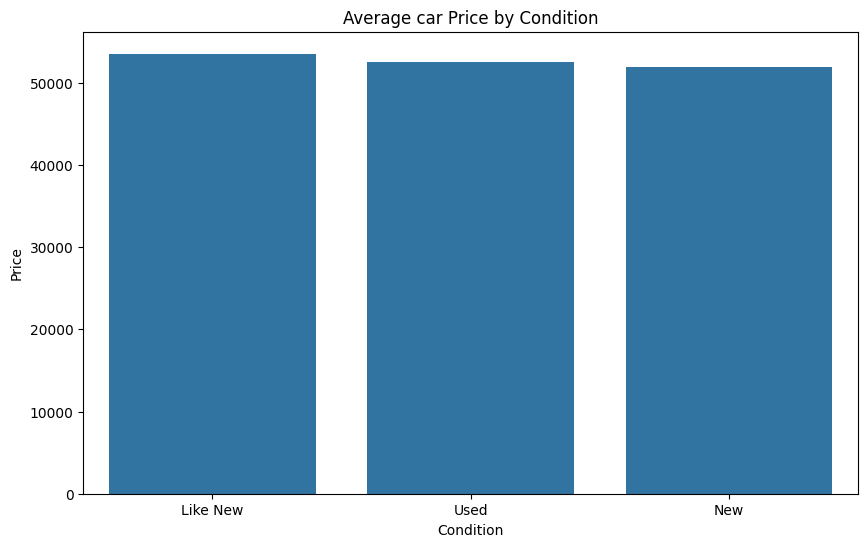

In [40]:
plt.figure(figsize=(10,6))
avg_price_condition = df.groupby('Condition')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_condition.index, y=avg_price_condition.values)
plt.title('Average car Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

The bar chart "Average car Price by Condition" shows the average prices for "New," "Like New," and "Used" cars to be nearly identical. Specifically, the "Like New" category shows a slightly higher average price than the "New" category.